### Date Loading codes for users

Displaying: photo_256@31-08-2021_22-34-34_0.png
Drawer: REDI FRESH PRODUCE,INC.
26-322NDSTREET
ASTORIA, NY 11102
Coordinates: Left: 156, Top: 82, Width: 257, Height: 61
Check Number: 27013
Coordinates: Left: 951, Top: 42, Width: 96, Height: 41
Date: 6/17/2021
Coordinates: Left: 892, Top: 115, Width: 90, Height: 30
Date: 1-2/210
Coordinates: Left: 536, Top: 111, Width: 55, Height: 28
Payee: Playa del Sol Association Inc
Coordinates: Left: 37, Top: 172, Width: 341, Height: 45
Amount in Words: Two Thousand Seven Hundred Twelve and 72/100
Coordinates: Left: 56, Top: 216, Width: 974, Height: 39
Amount in Numbers: 2,712.72
Coordinates: Left: 868, Top: 179, Width: 117, Height: 36
Signature: 
Coordinates: Left: 688, Top: 288, Width: 344, Height: 100
Drawee: CHASE
Coordinates: Left: 537, Top: 54, Width: 75, Height: 20
Memo: 
Coordinates: Left: 33, Top: 358, Width: 55, Height: 21
Payee Address: Playa del Sol
3500 Galt Ocean Drive
Ft. Lauderdale, FL 33308
Coordinates: Left: 116, Top: 266, Width: 

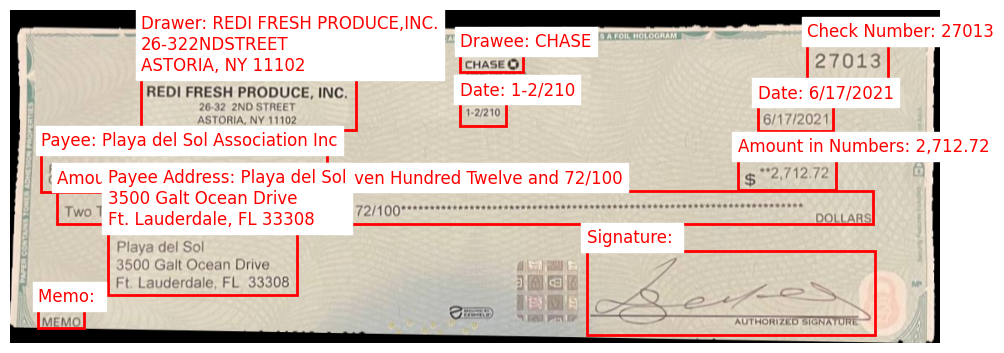

In [4]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def load_data(images_path, gts_path):
    # List all image files
    image_files = [f for f in os.listdir(images_path) if f[0] != "." and f.endswith('.png')]

    # List all corresponding JSON files
    json_files = [f.replace('.png', '.json') for f in image_files if f[0] != "."]

    # Verify that both image and JSON files exist
    valid_files = [(img, os.path.join(gts_path, js)) for img, js in zip(image_files, json_files) if os.path.isfile(os.path.join(gts_path, js))]

    # Dictionary to store mappings
    file_dict = {img: js for img, js in valid_files}

    return file_dict

def translate_code(code):
    translations = {
        "\u4ed8\u6b3e\u4eba": "Drawer",
        "\u6536\u6b3e\u4eba": "Payee",
        "\u6536\u6b3e\u4eba\u8be6\u7ec6\u5730\u5740": "Payee Address",
        "\u65e5\u671f": "Date",
        "\u5c0f\u5199\u91d1\u989d": "Amount in Numbers",
        "\u5927\u5199\u91d1\u989d": "Amount in Words",
        "\u7b7e\u540d": "Signature",
        "memo_for": "Memo",
        "\u5c0f\u7f16\u53f7": "Routing Number",
        "\u652f\u7968\u7f16\u53f7": "Check Number",
        "\u94f6\u884clogo": "Drawee"
    }
    return translations.get(code, code)

def visualize_sample(images_path, image_file, json_file):
    # Load image
    img = Image.open(os.path.join(images_path, image_file))
    
    # Load JSON
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)
    
    print(f"Displaying: {image_file}")
    for item in data:
        rect = item['rect']
        label = translate_code(item['type'])
        value = item['value']
        
        # Draw rectangle
        patch = patches.Rectangle(
            (rect['left'], rect['top']), rect['width'], rect['height'], 
            linewidth=2, edgecolor='red', facecolor='none'
        )
        ax.add_patch(patch)
        
        # Add label and value
        ax.text(rect['left'], rect['top'] - 10, f"{label}: {value}", color='red', fontsize=12, backgroundcolor='white')
        print(f"{label}: {value}")
        print(f"Coordinates: Left: {rect['left']}, Top: {rect['top']}, Width: {rect['width']}, Height: {rect['height']}")
    
    plt.axis('off')
    plt.show()

# Define the directories for loading data
images_path = "/home/larry5/project/LLaVA-1.6-ft/data/data/03/dataset/images/train"
gts_path = images_path.replace("images", "values")

# Load data
file_dict = load_data(images_path, gts_path)

# Display one sample
if file_dict:
    sample_image = list(file_dict.keys())[13]
    sample_json = file_dict[sample_image]
    visualize_sample(images_path, sample_image, sample_json)
else:
    print("No valid image and JSON file pairs found.")
